## 과제4: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화

### 목표 : 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.
### 조건 :
- 거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.
- 출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.
- 시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)


### 단계별 요구 사항
1. 난수 좌표 생성 :
 [0, 1) 범위에서 100개의 2차원 좌표를 생성.

In [148]:
import numpy as np

In [149]:
XY = np.random.rand(100, 2)
XY[:10]

array([[0.46617575, 0.39074315],
       [0.49497521, 0.67588458],
       [0.9866393 , 0.20084628],
       [0.15377413, 0.63076667],
       [0.73322765, 0.61916327],
       [0.79197146, 0.03317464],
       [0.7587281 , 0.22656373],
       [0.37188811, 0.92727943],
       [0.00396117, 0.2363566 ],
       [0.22566121, 0.85123242]])

2. 거리 행렬 계산 :
각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.

In [150]:
dist_sq = np.sum((XY[:, np.newaxis, :] - XY[np.newaxis, :, :]) ** 2, axis=2)
dist_sq[:5, :5]

array([[0.        , 0.08213504, 0.30694313, 0.15520606, 0.12349246],
       [0.08213504, 0.        , 0.46739497, 0.1184538 , 0.05998153],
       [0.30694313, 0.46739497, 0.        , 0.87849593, 0.23920657],
       [0.15520606, 0.1184538 , 0.87849593, 0.        , 0.33590102],
       [0.12349246, 0.05998153, 0.23920657, 0.33590102, 0.        ]])

3. 5-최근접 이웃 찾기 :
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.

In [151]:
near_partition = np.argpartition(dist_sq, 6, axis=1)

4. 결과 출력 :
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.

In [152]:
for i in range(100):
  print('point', i, ': ', XY[i])
  print('nearest_5 points: ', XY[near_partition[i, 1:6]])
  print('distance_square: ', dist_sq[i, near_partition[i, 1:6]])


point 0 :  [0.46617575 0.39074315]
nearest_5 points:  [[0.47185335 0.39610761]
 [0.42697221 0.32604537]
 [0.37796278 0.33741697]
 [0.54881191 0.46739365]
 [0.39596553 0.48168681]]
distance_square:  [6.10125311e-05 5.72272116e-03 1.06252114e-02 1.27040318e-02
 1.32002251e-02]
point 1 :  [0.49497521 0.67588458]
nearest_5 points:  [[0.45988165 0.69356756]
 [0.49848822 0.6056355 ]
 [0.4665773  0.77837462]
 [0.52146215 0.78135543]
 [0.38224636 0.6354387 ]]
distance_square:  [0.00154425 0.00494727 0.01131065 0.01182566 0.01434366]
point 2 :  [0.9866393  0.20084628]
nearest_5 points:  [[0.94814839 0.33277322]
 [0.9970008  0.04536474]
 [0.85770168 0.11191435]
 [0.96601728 0.37199566]
 [0.9526087  0.40651417]]
distance_square:  [0.01888627 0.02428187 0.0245338  0.02971738 0.04345736]
point 3 :  [0.15377413 0.63076667]
nearest_5 points:  [[0.14607875 0.61744229]
 [0.22505513 0.60581162]
 [0.1997676  0.69397807]
 [0.26806666 0.63834885]
 [0.07096972 0.71393333]]
distance_square:  [0.00023676 0.00

5. 시각화 :
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.

In [153]:
import matplotlib.pyplot as plt

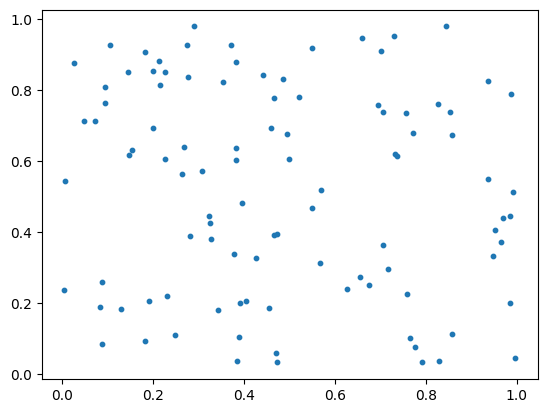

In [154]:
plt.scatter(XY[:, 0], XY[:, 1], s=10)

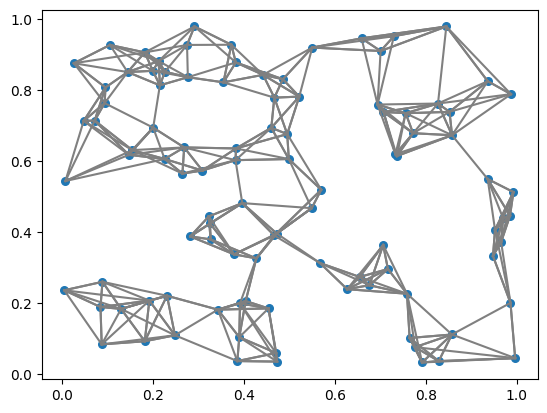

In [155]:
plt.scatter(XY[:, 0], XY[:, 1], s=30)
for i in range(100):
  for j in near_partition[i, 1:6]:
    plt.plot(*zip(XY[j], XY[i]), color='gray')